In [1]:
import sys
sys.path

['/home/jupyter-extstudent17-17/Public/week1',
 '/opt/tljh/user/lib/python39.zip',
 '/opt/tljh/user/lib/python3.9',
 '/opt/tljh/user/lib/python3.9/lib-dynload',
 '',
 '/home/jupyter-extstudent17-17/.local/lib/python3.9/site-packages',
 '/opt/tljh/user/lib/python3.9/site-packages']

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Generating the set of training data examples
# The training data represent the dots on the 2D graph

np.random.seed(96)

# Generate random number of patterns
NPATS = int(10 + np.floor(np.random.rand() * 30))
print(NPATS)

16


In [4]:
np.random.rand() * 30

27.285071140249908

In [5]:
# Generate random patterns
# A matrix called patterns is created here
Patterns = np.random.rand(2, NPATS) * 2 - 1

In [6]:
Patterns

array([[ 0.63447075,  0.80776095,  0.41375854, -0.7638476 , -0.81519837,
         0.123948  ,  0.14282393, -0.92208607, -0.34690507, -0.41836363,
         0.02112635, -0.39230637, -0.39251203, -0.71365568, -0.92733994,
        -0.20152932],
       [ 0.49368407,  0.7099355 ,  0.30936092,  0.93258009,  0.28731065,
         0.48853434,  0.66400516, -0.98808389,  0.06671535,  0.84165515,
        -0.63343227,  0.97389636, -0.06081583,  0.11251483, -0.49774   ,
        -0.12767552]])

In [7]:
# this means that each class as 16 elements
print(Patterns.shape) #shape: rows, columns

(2, 16)


In [8]:
# Generate random slope and y-intercept
# Generating the decision boundary 
slope = np.log(np.random.rand() * 10)
yint = np.random.rand() * 2 - 1
slope,yint

(2.1103841937288017, 0.27397497141187577)

In [9]:
# Generate desired output for the patterns
# calculating the desired vector
Desired_b =(Patterns[1,:] - Patterns[0,:] * slope - yint) > 0
Desired=np.reshape(Desired_b.astype(int),(1,NPATS))

In [10]:
print(Desired_b.shape)
print(Desired.shape)
print(Desired)

(16,)
(1, 16)
[[0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1]]


In [11]:
Desired[0][2] <- 0

False

In [12]:
# Desicon Boundary line is defined as w0+ w1*x + w2*y =0
# Create Inputs and Weights matrices
Inputs = np.vstack((np.ones(NPATS), Patterns)) #input matrix
Weights = np.array([0, 0, 0]) #matrix of weights

In [13]:
print(Inputs)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [ 0.63447075  0.80776095  0.41375854 -0.7638476  -0.81519837  0.123948
   0.14282393 -0.92208607 -0.34690507 -0.41836363  0.02112635 -0.39230637
  -0.39251203 -0.71365568 -0.92733994 -0.20152932]
 [ 0.49368407  0.7099355   0.30936092  0.93258009  0.28731065  0.48853434
   0.66400516 -0.98808389  0.06671535  0.84165515 -0.63343227  0.97389636
  -0.06081583  0.11251483 -0.49774    -0.12767552]]


In [14]:

def plot_pats(ax,Patterns,Desired_b):
# Define x and y values
 xt=Patterns[0,Desired_b]
 yt=Patterns[1,Desired_b]
 xf=Patterns[0,~ Desired_b]
 yf=Patterns[1,~ Desired_b]
 ax.plot(xt,yt,marker='+', linestyle='None',color='blue')
 ax.plot(xf,yf,marker='o', linestyle='None',color='red')
 

In [15]:

def boundaryLine(xl,W):
#plot line
 d = W[0,2]
 if abs(d) < 0.001:
    d = 0.001
 yl=-W[0,0]/d-(W[0,1]/d)*xl
 return yl
 

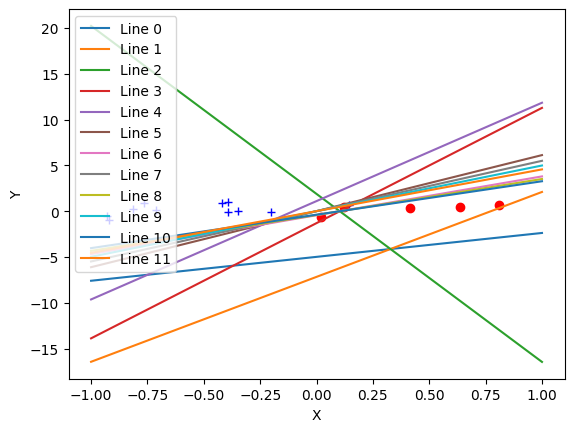

In [16]:
# Show the plot
fig, ax = plt.subplots()
xl=np.linspace(-1, 1, 100)
plot_pats(ax,Patterns,Desired_b)

Weights = np.array([0, 0, 0])
for i in range(50):
    Result = (np.dot(Weights, Inputs) > 0).astype(int)
    if np.array_equal(Result, Desired):
        break
    Weights = Weights + np.dot((Desired - Result), Inputs.T)
#    print(f"{i+1:2d}. Weights = {Weights}")
    
    yl=boundaryLine(xl,Weights) 
    ax.plot(xl, yl, label=f"Line {i}")
    
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()    
plt.show()    

In [17]:
print(i)

12


In [18]:
print(Result)

[[0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1]]


Final boundary line 

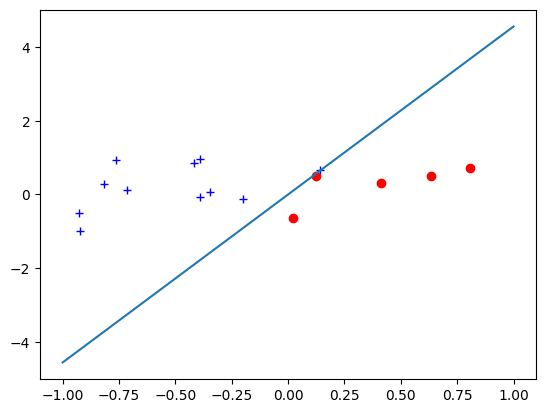

In [19]:
fig1, ax1 = plt.subplots()
plot_pats(ax1,Patterns,Desired_b)
y=boundaryLine(xl,Weights) 
ax1.plot(xl, y, label=f"Line {i}")
plt.show()    